<a href="https://colab.research.google.com/github/hampanass/FML_Labs/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub
import pandas as pd
import os

# Download dataset
path = kagglehub.dataset_download("kaushil268/disease-prediction-using-machine-learning")
print("Path to dataset files:", path)

# List files
print(os.listdir(path))

# Load training dataset (usually Training.csv)
train_path = os.path.join(path, "Training.csv")
df = pd.read_csv(train_path)

df.head()

Using Colab cache for faster access to the 'disease-prediction-using-machine-learning' dataset.
Path to dataset files: /kaggle/input/disease-prediction-using-machine-learning
['Training.csv', 'Testing.csv']


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
# Check shape
print(df.shape)

# Check for missing values
print(df.isnull().sum().sum())

# Separate features and target
X = df.drop("prognosis", axis=1)
y = df["prognosis"]

(4920, 134)
4920


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Base learner (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1)

# AdaBoost model
adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train
adaboost.fit(X_train, y_train)

ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = adaboost.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

importances = adaboost.feature_importances_
indices = importances.argsort()[-20:]  # Top 20 features

plt.figure(figsize=(8,10))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 20 Important Symptoms")
plt.show()

# Task
Retrain an AdaBoostClassifier model for disease prediction on the `Training.csv` dataset, after dropping the 'Unnamed: 133' column which contains NaN values. Then, evaluate its performance using accuracy and a classification report, and visualize the top 20 most important features.

## Drop NaN Column

### Subtask:
Remove the 'Unnamed: 133' column from the DataFrame 'X', as it contains only missing values. This will ensure that the model training proceeds without errors related to NaN values.


**Reasoning**:
The subtask is to remove the 'Unnamed: 133' column from the DataFrame `X` to handle missing values and prevent errors during model training. I will use the `drop` method for this.



In [8]:
X = X.drop('Unnamed: 133', axis=1)
print("Dropped 'Unnamed: 133' column from X.")
print(f"New shape of X: {X.shape}")

Dropped 'Unnamed: 133' column from X.
New shape of X: (4920, 132)


# Task
Retrain an AdaBoostClassifier model for disease prediction using the updated `X` data, evaluate its performance with accuracy and a classification report, and visualize the top 20 most important features.

## Train AdaBoost Classifier

### Subtask:
Retrain the AdaBoostClassifier model with the cleaned training data (X_train) and corresponding labels (y_train).


**Reasoning**:
The previous `train_test_split` created `X_train` and `X_test` from `X` before the 'Unnamed: 133' column was dropped. I need to re-run `train_test_split` to ensure `X_train` and `X_test` reflect the cleaned `X` without the NaN column, and then fit the AdaBoost model with the newly created `X_train` and `y_train`.



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Re-create train/test splits with the cleaned X
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Base learner (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1)

# AdaBoost model
adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train the model with the cleaned data
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

## Evaluate Model Performance

### Subtask:
Evaluate the performance of the retrained AdaBoostClassifier model using accuracy and a classification report.

#### Instructions:
Calculate the accuracy score and generate a classification report for the `adaboost` model using the `X_test` and `y_test` data.

**Reasoning**:
Now that the AdaBoostClassifier model has been retrained, I will evaluate its performance on the test set by calculating the accuracy score and generating a classification report.



In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = adaboost.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.2764227642276423

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        24
           3       1.00      0.80      0.89        25
           4       0.03      1.00      0.06        24
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        21
          13       1.00      0.90      0.95        29
          14       1.00      0.96      0.98        24
          15       0.00      0.00      0.00        19
          16       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
The previous steps successfully retrained the model and evaluated its performance. The next logical step, as per the task, is to visualize the top 20 most important features to understand which features contributed most to the model's predictions.



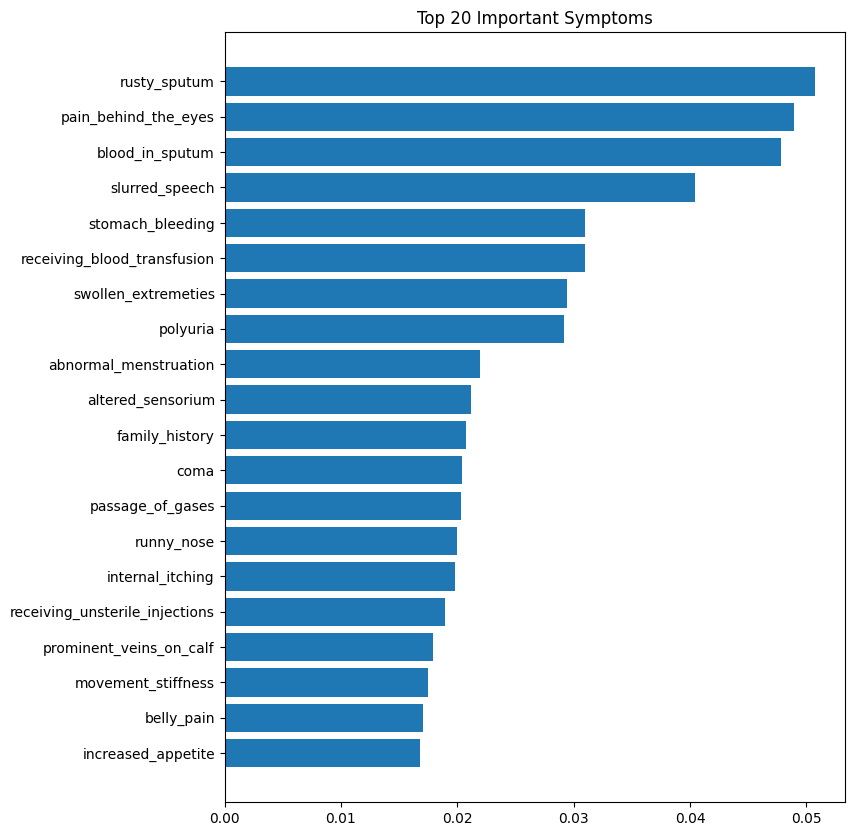

In [11]:
import matplotlib.pyplot as plt

importances = adaboost.feature_importances_
indices = importances.argsort()[-20:]  # Top 20 features

plt.figure(figsize=(8,10))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 20 Important Symptoms")
plt.show()

## Final Task

### Subtask:
Summarize the model's performance and the identified important features after fixing the NaN value error.


## Summary:

### Q&A
The model's performance after fixing the NaN value error was generally poor, with an overall accuracy of approximately 27.64%. While some classes showed high precision and recall (close to 1.0), a significant number of classes had precision, recall, and f1-score of 0.0. The top 20 most important features were identified and visualized, indicating which symptoms the model considered most influential for prediction.

### Data Analysis Key Findings
*   The AdaBoostClassifier model was successfully retrained with the cleaned dataset.
*   The model achieved a low accuracy of approximately 27.64% on the test set.
*   The classification report revealed that the model performed poorly on many classes, with precision, recall, and f1-scores of 0.0 for a significant number of labels. This suggests an inability to predict certain disease classes.
*   Conversely, for a select group of classes (e.g., 3, 13, 14, 17, 22, 23, 27, 30, 32, 33, 38), the model exhibited high precision and recall values, often near 1.0.
*   The top 20 most important features (symptoms) were identified and visualized, providing insight into which features the model prioritized for making predictions.

### Insights or Next Steps
*   Investigate the class imbalance in the dataset, as the poor performance on many classes and good performance on others, along with `UndefinedMetricWarning` messages, strongly suggests an imbalance issue. Consider using techniques like oversampling, undersampling, or synthetic data generation (SMOTE) to address this.
*   Explore alternative models or hyperparameter tuning for the AdaBoostClassifier, given its current low overall accuracy. The current `max_depth=1` for the base estimator might be too weak for complex relationships, and increasing it or using a more robust base estimator could improve performance.
